# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# env = UnityEnvironment(file_name="/home/arasdar/VisualBanana_Linux/Banana.x86")
# env = UnityEnvironment(file_name="/home/arasdar/unity-envs/Banana_Linux/Banana.x86_64")
env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Banana_Linux_NoVis/Banana.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
# print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
# print(state.shape, len(env_info.vector_observations), env_info.vector_observations.shape)

Number of agents: 1
Number of actions: 4
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
for steps in range(1):
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        print(state.shape)
        break
    
print("Score and steps: {} and {}".format(score, steps))

Score and steps: 0.0 and 0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


In [8]:
import tensorflow as tf
print('TensorFlow Version: {}'.format(tf.__version__))
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [9]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
batch = []
while True: # infinite number of steps
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    #print(state, action, reward, done)
    batch.append([action, state, reward, done])
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 2.0


In [10]:
batch[0], batch[0][1].shape

([3, array([0.        , 0.        , 1.        , 0.        , 0.53088671,
         0.        , 0.        , 1.        , 0.        , 0.10077096,
         0.        , 1.        , 0.        , 0.        , 0.63564986,
         1.        , 0.        , 0.        , 0.        , 0.14294983,
         0.        , 0.        , 1.        , 0.        , 0.69379312,
         0.        , 0.        , 1.        , 0.        , 0.73422182,
         0.        , 0.        , 1.        , 0.        , 0.09551248,
         0.        , 0.        ]), 0.0, False], (37,))

In [11]:
batch[0][1].shape

(37,)

In [12]:
batch[0]

[3, array([0.        , 0.        , 1.        , 0.        , 0.53088671,
        0.        , 0.        , 1.        , 0.        , 0.10077096,
        0.        , 1.        , 0.        , 0.        , 0.63564986,
        1.        , 0.        , 0.        , 0.        , 0.14294983,
        0.        , 0.        , 1.        , 0.        , 0.69379312,
        0.        , 0.        , 1.        , 0.        , 0.73422182,
        0.        , 0.        , 1.        , 0.        , 0.09551248,
        0.        , 0.        ]), 0.0, False]

In [13]:
states = np.array([each[1] for each in batch])
actions = np.array([each[0] for each in batch])
states = np.array([each[1] for each in batch])
rewards = np.array([each[2] for each in batch])
dones = np.array([each[3] for each in batch])
# infos = np.array([each[4] for each in batch])

In [14]:
# print(rewards[:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)), 
      (np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

(300,) (300, 37) (300,) (300,)
float64 float64 int64 bool
3 0 4
1.0 0.0
10.784914016723633 -10.556321144104004


In [15]:
def model_input(state_size):
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    actions = tf.placeholder(tf.int32, [None], name='actions')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    return states, actions, targetQs

In [1]:
# Generator: Generating/prediting the actions
def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        h1 = tf.layers.dense(inputs=states, units=hidden_size)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        return logits

In [17]:
def model_loss(actions, states, targetQs, action_size, hidden_size):
    actions_logits = generator(states=states, hidden_size=hidden_size, action_size=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    Qs = tf.reduce_max(actions_logits*actions_labels, axis=1)
    loss = tf.reduce_mean(tf.square(Qs - targetQs))
    return actions_logits, loss

In [18]:
def model_opt(loss, learning_rate):
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        opt = tf.train.AdamOptimizer(learning_rate).minimize(loss, var_list=g_vars)

    return opt

In [19]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.loss = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init parameters
            states=self.states, actions=self.actions, targetQs=self.targetQs) # model input

        # Update the model: backward pass and backprop
        self.opt = model_opt(loss=self.loss, learning_rate=learning_rate)

In [20]:
from collections import deque
class Memory():
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size)
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

In [21]:
print('state size:{}'.format(states.shape), 
      'actions:{}'.format(actions.shape)) 
print('action size:{}'.format(np.max(actions) - np.min(actions)+1))

state size:(300, 37) actions:(300,)
action size:4


In [22]:
# Network parameters
action_size = 4
state_size = 37
hidden_size = 37*2             # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 10000            # memory capacity
batch_size = 100                # experience mini-batch size
gamma = 0.99                   # future reward discount

In [23]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)

# Init the memory
memory = Memory(max_size=memory_size)

In [24]:
# state = env.reset()
# for _ in range(batch_size):
#     action = env.action_space.sample()
#     next_state, reward, done, _ = env.step(action)
#     memory.buffer.append([state, action, next_state, reward, float(done)])
#     state = next_state
#     if done is True:
#         state = env.reset()

In [25]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]   # get the state
for _ in range(memory_size):
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    memory.buffer.append([state, action, next_state, reward, float(done)])
    state = next_state
    if done:                                       # exit loop if episode finished
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the state
        break

In [26]:
# Save/load the model and save for plotting
saver = tf.train.Saver()
episode_rewards_list, rewards_list, loss_list = [], [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    episode_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window
    
    # Training episodes/epochs
    for ep in range(11111):
        total_reward = 0
        loss_batch = []
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the current state

        # Training steps/batches
        while True:
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
            action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            memory.buffer.append([state, action, next_state, reward, float(done)])
            total_reward += reward
            state = next_state
            
            # Training
            batch = memory.sample(batch_size)
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            next_states = np.array([each[2] for each in batch])
            rewards = np.array([each[3] for each in batch])
            dones = np.array([each[4] for each in batch])
            next_actions_logits = sess.run(model.actions_logits, feed_dict = {model.states: next_states})
            nextQs = np.max(next_actions_logits, axis=1) * (1-dones)
            targetQs = rewards + (gamma * nextQs)
            loss, _ = sess.run([model.loss, model.opt], feed_dict = {model.states: states, 
                                                                     model.actions: actions,
                                                                     model.targetQs: targetQs})
            loss_batch.append(loss)
            if done is True:
                break
                
        episode_reward.append(total_reward)
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episode_reward)),
              'R:{}'.format(total_reward),
              'loss:{:.4f}'.format(np.mean(loss_batch)))
        # Ploting out
        episode_rewards_list.append([ep, np.mean(episode_reward)])
        rewards_list.append([ep, total_reward])
        loss_list.append([ep, np.mean(loss_batch)])
        # Break episode/epoch loop
        if np.mean(episode_reward) >= +13:
            break
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model.ckpt')

Episode:0 meanR:1.0000 R:1.0 loss:0.9744
Episode:1 meanR:0.5000 R:0.0 loss:12.7429
Episode:2 meanR:0.6667 R:1.0 loss:26.6312
Episode:3 meanR:0.2500 R:-1.0 loss:16.0595
Episode:4 meanR:0.2000 R:0.0 loss:9.0172
Episode:5 meanR:0.1667 R:0.0 loss:5.7852
Episode:6 meanR:0.1429 R:0.0 loss:4.5670
Episode:7 meanR:0.1250 R:0.0 loss:3.2323
Episode:8 meanR:-0.1111 R:-2.0 loss:2.6165
Episode:9 meanR:-0.2000 R:-1.0 loss:1.8215
Episode:10 meanR:-0.1818 R:0.0 loss:1.5777
Episode:11 meanR:-0.1667 R:0.0 loss:1.0546
Episode:12 meanR:-0.0769 R:1.0 loss:0.7849
Episode:13 meanR:-0.0714 R:0.0 loss:0.7496
Episode:14 meanR:-0.2000 R:-2.0 loss:0.5953
Episode:15 meanR:-0.1875 R:0.0 loss:0.5936
Episode:16 meanR:-0.1765 R:0.0 loss:0.4888
Episode:17 meanR:-0.2778 R:-2.0 loss:0.5143
Episode:18 meanR:-0.2632 R:0.0 loss:0.3555
Episode:19 meanR:-0.1500 R:2.0 loss:0.3462
Episode:20 meanR:-0.1905 R:-1.0 loss:0.2835
Episode:21 meanR:-0.1818 R:0.0 loss:0.2092
Episode:22 meanR:-0.1739 R:0.0 loss:0.2071
Episode:23 meanR:-0.

Episode:192 meanR:9.2100 R:10.0 loss:0.0583
Episode:193 meanR:9.3200 R:18.0 loss:0.0653
Episode:194 meanR:9.3700 R:9.0 loss:0.0632
Episode:195 meanR:9.3500 R:12.0 loss:0.0630
Episode:196 meanR:9.4800 R:13.0 loss:0.0590
Episode:197 meanR:9.5200 R:9.0 loss:0.0630
Episode:198 meanR:9.5500 R:14.0 loss:0.0629
Episode:199 meanR:9.6500 R:12.0 loss:0.0726
Episode:200 meanR:9.5900 R:6.0 loss:0.0658
Episode:201 meanR:9.5900 R:12.0 loss:0.0695
Episode:202 meanR:9.5600 R:14.0 loss:0.0715
Episode:203 meanR:9.5400 R:12.0 loss:0.0673
Episode:204 meanR:9.7000 R:16.0 loss:0.0664
Episode:205 meanR:9.7600 R:14.0 loss:0.0727
Episode:206 meanR:9.8800 R:18.0 loss:0.0612
Episode:207 meanR:9.8100 R:9.0 loss:0.0758
Episode:208 meanR:9.8900 R:15.0 loss:0.0795
Episode:209 meanR:9.9400 R:11.0 loss:0.0756
Episode:210 meanR:10.0000 R:10.0 loss:0.0741
Episode:211 meanR:9.9800 R:10.0 loss:0.0581
Episode:212 meanR:10.1300 R:19.0 loss:0.0664
Episode:213 meanR:9.9500 R:-1.0 loss:0.0757
Episode:214 meanR:9.9600 R:10.0 lo

Episode:376 meanR:11.7300 R:12.0 loss:0.0849
Episode:377 meanR:11.7100 R:12.0 loss:0.0723
Episode:378 meanR:11.7400 R:18.0 loss:0.0808
Episode:379 meanR:11.8600 R:11.0 loss:0.0840
Episode:380 meanR:11.8400 R:13.0 loss:0.0829
Episode:381 meanR:11.8100 R:8.0 loss:0.0803
Episode:382 meanR:11.8500 R:16.0 loss:0.0763
Episode:383 meanR:11.9500 R:16.0 loss:0.0727
Episode:384 meanR:11.9400 R:11.0 loss:0.0852
Episode:385 meanR:11.9500 R:16.0 loss:0.0862
Episode:386 meanR:11.8900 R:8.0 loss:0.0780
Episode:387 meanR:11.9100 R:15.0 loss:0.0813
Episode:388 meanR:11.8700 R:11.0 loss:0.0825
Episode:389 meanR:11.8400 R:13.0 loss:0.0736
Episode:390 meanR:11.8200 R:7.0 loss:0.0875
Episode:391 meanR:11.8200 R:12.0 loss:0.0811
Episode:392 meanR:11.7800 R:7.0 loss:0.0808
Episode:393 meanR:11.7300 R:4.0 loss:0.0766
Episode:394 meanR:11.7200 R:6.0 loss:0.0743
Episode:395 meanR:11.7000 R:13.0 loss:0.0813
Episode:396 meanR:11.6000 R:4.0 loss:0.0852
Episode:397 meanR:11.4800 R:3.0 loss:0.0709
Episode:398 meanR:

Episode:560 meanR:12.7400 R:16.0 loss:0.0750
Episode:561 meanR:12.7200 R:13.0 loss:0.0734
Episode:562 meanR:12.6800 R:13.0 loss:0.0769
Episode:563 meanR:12.5800 R:7.0 loss:0.0698
Episode:564 meanR:12.5700 R:17.0 loss:0.0756
Episode:565 meanR:12.5700 R:12.0 loss:0.0721
Episode:566 meanR:12.5200 R:15.0 loss:0.0781
Episode:567 meanR:12.6000 R:13.0 loss:0.0799
Episode:568 meanR:12.5100 R:10.0 loss:0.0741
Episode:569 meanR:12.5000 R:13.0 loss:0.0777
Episode:570 meanR:12.4100 R:4.0 loss:0.0779
Episode:571 meanR:12.4900 R:20.0 loss:0.0683
Episode:572 meanR:12.5700 R:22.0 loss:0.0724
Episode:573 meanR:12.6300 R:18.0 loss:0.0791
Episode:574 meanR:12.6100 R:13.0 loss:0.0738
Episode:575 meanR:12.6300 R:12.0 loss:0.0819
Episode:576 meanR:12.6200 R:12.0 loss:0.0691
Episode:577 meanR:12.5800 R:14.0 loss:0.0709
Episode:578 meanR:12.6100 R:12.0 loss:0.0769
Episode:579 meanR:12.6600 R:11.0 loss:0.0730
Episode:580 meanR:12.7100 R:15.0 loss:0.0757
Episode:581 meanR:12.6400 R:7.0 loss:0.0776
Episode:582 m

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0, 0.5, 'Episode rewards')

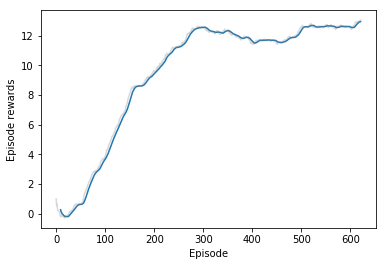

In [28]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Episode rewards')

Text(0, 0.5, 'Total rewards')

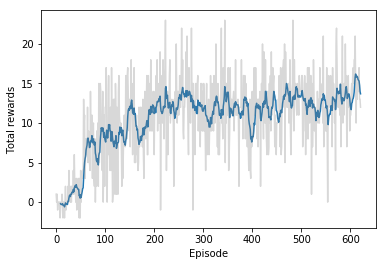

In [29]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Average losses')

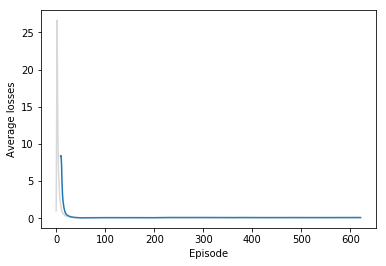

In [30]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

Text(0, 0.5, 'Episode rewards')

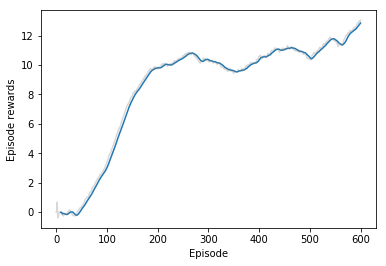

In [30]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Episode rewards')

Text(0, 0.5, 'Total rewards')

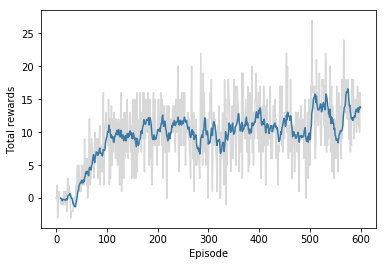

In [31]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0,0.5,'Average losses')

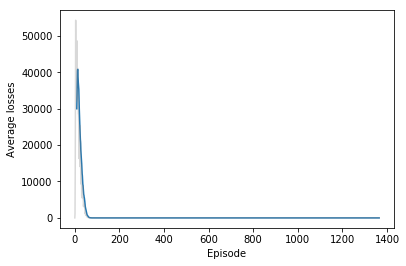

In [36]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

In [31]:
# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Testing episodes/epochs
    for _ in range(1):
        total_reward = 0
        #state = env.reset()
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the current state

        # Testing steps/batches
        while True:
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
            action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            total_reward += reward
            if done:
                break
                
        print('total_reward: {:.2f}'.format(total_reward))

INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt


total_reward: 16.00


In [ ]:
# Be careful!!!!!!!!!!!!!!!!
# Closing the env
env.close()